## Online Course Ceritification Type Prediction 

Given data about online courses from MIT and Harvard, let's try to predict whether a given course offers **honor code certificates**.

We will use a random forest classification model within a scikit-learn pipeline to make our predictions. 

Data Source: https://www.kaggle.com/datasets/edx/course-study

### Getting Started

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('appendix.csv')
data

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,3003,15.04,8.32,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,5783,14.27,9.22,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,2082,17.13,12.49,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,1439,9.96,1.11,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,5058,20.44,9.64,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,HarvardX,MUS24.4x,07/21/2016,First Nights: Symphonie Fantastique,Tom Kelly,"Humanities, History, Design, Religion, and Edu...",4,0,615,305,20,49.59,3.25,6.56,80.81,8.78,3.25,1.71,5.93,38.0,56.82,43.18,74.66
286,HarvardX,GSE4x,07/25/2016,Introduction to Family Engagement in Education,Karen Mapp,"Humanities, History, Design, Religion, and Edu...",4,0,2871,267,20,9.30,0.70,7.49,70.11,0.00,0.70,4.26,11.33,34.0,25.24,74.76,82.31
287,MITx,6.302.0x,08/01/2016,Introduction to Control System Design,"Jacob White, Joe Steinmeyer","Science, Technology, Engineering, and Mathematics",4,0,3937,974,49,24.74,1.24,5.03,12.27,4.72,8.23,15.62,58.50,24.0,91.17,8.83,61.32
288,MITx,6.302.1x,08/01/2016,Introduction to State Space Control,"Jacob White, Joe Steinmeyer","Science, Technology, Engineering, and Mathematics",4,0,1431,208,8,14.54,0.56,3.85,0,3.84,5.73,3.22,62.38,25.0,93.44,6.56,72.31


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Institution                                   290 non-null    object 
 1   Course Number                                 290 non-null    object 
 2   Launch Date                                   290 non-null    object 
 3   Course Title                                  290 non-null    object 
 4   Instructors                                   289 non-null    object 
 5   Course Subject                                290 non-null    object 
 6   Year                                          290 non-null    int64  
 7   Honor Code Certificates                       290 non-null    int64  
 8   Participants (Course Content Accessed)        290 non-null    int64  
 9   Audited (> 50% Course Content Accessed)       290 non-null    int

### Preprocessing

In [20]:
def preprocess_inputs(df):
    df = df.copy()

    # Drop unused columns
    df = df.drop(['Course Number', 'Course Title', 'Instructors'], axis=1)

    # Fill missing values
    df['% Played Video'] = df['% Played Video'].replace('---', np.NaN).astype(float)
    df['% Played Video'] = df['% Played Video'].fillna(df['% Played Video'].mean())

    # Extract date features
    df['Launch Date'] = pd.to_datetime(df['Launch Date'])
    df['Launch Year'] = df['Launch Date'].apply(lambda x: x.year)
    df['Launch Month'] = df['Launch Date'].apply(lambda x: x.month)
    df['Launch Day'] = df['Launch Date'].apply(lambda x: x.day)
    df = df.drop('Launch Date', axis=1)

    # Split df into X and y
    y = df['Honor Code Certificates']
    X = df.drop('Honor Code Certificates', axis=1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    return X_train, X_test, y_train, y_test

In [21]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [22]:
X_train

,Institution,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher,Launch Year,Launch Month,Launch Day
107,MITx,"Government, Health, and Social Science",3,30780,7955,2689,25.84,8.74,32.13,75.53,15.29,13.53,110.41,12.23,29.0,78.22,21.78,72.88,2015,1,9
242,MITx,"Government, Health, and Social Science",4,4250,494,296,11.62,6.96,59.72,64.96,6.59,22.45,45.06,85.52,27.0,54.14,45.86,78.42,2016,2,22
245,HarvardX,"Humanities, History, Design, Religion, and Edu...",4,22153,4897,282,22.11,1.27,5.76,77.24,34.35,1.28,79.36,26.43,39.0,36.96,63.04,78.46,2016,3,1
79,HarvardX,"Government, Health, and Social Science",3,9010,2166,1494,24.07,16.60,68.98,58.71,22.92,39.80,40.60,15.92,31.0,49.87,50.13,82.70,2014,9,16
274,MITx,"Science, Technology, Engineering, and Mathematics",4,4825,715,92,14.82,1.91,12.87,67.83,5.37,33.49,29.82,49.80,26.0,54.56,45.44,68.23,2016,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,MITx,"Government, Health, and Social Science",4,2599,1172,436,45.09,16.78,37.20,69.41,16.93,42.17,30.39,33.65,28.0,59.53,40.47,76.87,2015,10,27
255,HarvardX,"Humanities, History, Design, Religion, and Edu...",4,3049,759,45,24.89,1.48,5.93,72.94,18.60,1.57,24.48,59.94,36.0,39.50,60.50,75.44,2016,4,8
72,MITx,"Science, Technology, Engineering, and Mathematics",3,11841,1532,502,12.94,4.24,32.77,62.87,4.90,13.95,81.04,63.12,25.0,84.01,15.99,65.85,2014,9,3
235,MITx,"Science, Technology, Engineering, and Mathematics",4,17354,1830,136,10.55,0.78,7.43,67.28,3.09,12.22,269.33,212.83,27.0,83.52,16.48,72.77,2016,2,2


In [24]:
y_train.value_counts()

Honor Code Certificates
1    166
0     37
Name: count, dtype: int64

### Building Pipeline

In [52]:
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, drop='if_binary'))
])

preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_transformer, ['Institution', 'Course Subject'])
], remainder='passthrough')

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        random_state=1,
        class_weight={
            0: 1.0,
            1: 5.0
        }
    ))
])

### Training

In [53]:
model.fit(X_train, y_train)

/home/aditya/miniconda3/envs/ds-env/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['Institution',
                                                   'Course Subject'])])),
                ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 1.0, 1: 5.0},
                                        random_state=1))])

### Results

In [54]:
y_pred = model.predict(X_test)
acc = model.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
clr = classification_report(y_test, y_pred, labels=[0,1], target_names=['Negative', 'Positive'])

Accuracy: 95.40%


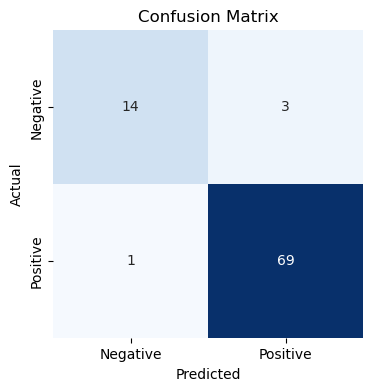

Classification Report: 
---------------
               precision    recall  f1-score   support

    Negative       0.93      0.82      0.88        17
    Positive       0.96      0.99      0.97        70

    accuracy                           0.95        87
   macro avg       0.95      0.90      0.92        87
weighted avg       0.95      0.95      0.95        87



In [55]:
print("Accuracy: {:.2f}%".format(acc*100))

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report: \n---------------\n', clr)